In [1]:
import sys
import os
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import numpy as np
import mne
from scipy.io import savemat
import fnmatch
from mne.datasets import eegbci, fetch_fsaverage
import matplotlib.pyplot as plt

In [2]:
f1='C:/Users/amukesh/Downloads/ABR_human'
os.chdir(f1)
fl=os.listdir(f1)
bdfs=fnmatch.filter(fl,'*.bdf')
bdfs = fnmatch.filter(os.listdir(),'*.bdf')
ss=[sum([ord(char) for char in string]) for string in bdfs]
kp=(np.argsort(ss)).tolist()
bdfs=[bdfs[ii] for ii in kp]
rawlist=[]
eveslist=[]
for rawname in bdfs:
    rawtemp,evestemp = bs.importbdf(rawname, verbose='DEBUG',refchans=['EXG1', 'EXG2'])
    rawlist += [rawtemp, ]
    eveslist += [evestemp, ]
raw, eves = mne.concatenate_raws(rawlist, events_list=eveslist)

Loading a default 32 channel montage.
Extracting EDF parameters from C:\Users\amukesh\Downloads\ABR_human\DoD9_ABR.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8716287  =      0.000 ...   532.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
9590 events found on stim channel Status
Event IDs: [  3   9  48 128 144 253]
Loading a default 32 channel montage.
Extracting EDF parameters from C:\Users\amukesh\Downloads\ABR_human\DoD9_ABR+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8716287  =      0.000 ...   532.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero ini

In [3]:
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = os.path.dirname(fs_dir)
subject = "fsaverage"
trans = "fsaverage"  # MNE has a built-in fsaverage transformation
src = os.path.join(fs_dir, "bem", "fsaverage-ico-5-src.fif")
bem = os.path.join(fs_dir, "bem", "fsaverage-5120-5120-5120-bem-sol.fif")
mri= os.path.join(fs_dir, "mri", "aseg.mgz")
montage = mne.channels.make_standard_montage("biosemi32")
raw.set_eeg_reference(projection=True)
mdc = dict(zip(raw.ch_names,montage.ch_names))
raw.rename_channels(mdc)
raw.set_montage(montage,on_missing='ignore')
raw.pick_channels(montage.ch_names)

0 files missing from root.txt in C:\Users\amukesh\mne_data\MNE-fsaverage-data
0 files missing from bem.txt in C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage
EEG channel type selected for re-referencing
Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).


<RawEDF | DoD9_ABR.bdf, 32 x 18448384 (1126.0 s), ~4.40 GiB, data loaded>

In [4]:
surf_src=mne.setup_source_space(subject, spacing='oct5', subjects_dir=subjects_dir, add_dist=False)
labels_vol = ["Left-Thalamus-Proper", "Right-Thalamus-Proper", "Brain-Stem"]
vol_src = mne.setup_volume_source_space(subject, mri=mri, pos=5.0, subjects_dir=subjects_dir, volume_label=None)
src = surf_src + vol_src

Setting up the source space with the following parameters:

SUBJECTS_DIR = C:\Users\amukesh\mne_data\MNE-fsaverage-data
Subject      = fsaverage
Surface      = white
Octahedron subdivision grade 5

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.white...
Mapping lh fsaverage -> oct (5) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 1026/163842 selected to source space (oct = 5)

Loading C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\surf\rh.white...
Mapping rh fsaverage -> oct (5) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\surf\rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 1026/163842 select

In [5]:
#raw.filter(100., 3000., fir_design='firwin')
tmin, tmax = -0.002, 0.015
rejthresh = 100e-6  # Because of high-pass but using median
epochs = mne.Epochs(raw, eves, [3, 9, 48, 144], tmin=tmin, proj=True, tmax=tmax, baseline=(-0.002, 0),reject=dict(eeg=rejthresh))
evoked=epochs.average()

Not setting metadata
20288 matching events found
Applying baseline correction (mode: mean)
Created an SSP operator (subspace dimension = 1)
1 projection items activated
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
   

In [6]:
fwd_surf = mne.make_forward_solution(raw.info, trans=trans, src=surf_src, bem=bem, meg=False, eeg=True)
noise_cov = mne.compute_covariance(epochs, method='auto')
loose_mix = 0.2
inverse_operator = mne.minimum_norm.make_inverse_operator(raw.info, fwd_surf, noise_cov, loose=loose_mix, depth=0.8)
stc_surf = mne.minimum_norm.apply_inverse(evoked, inverse_operator, lambda2=1/9, method='dSPM')

fwd_vol = mne.make_forward_solution(raw.info, trans=trans, src=vol_src, bem=bem, meg=False, eeg=True)
noise_cov = mne.compute_covariance(epochs, method='auto')
loose_mix = 1.0
inverse_operator = mne.minimum_norm.make_inverse_operator(raw.info, fwd_vol, noise_cov, loose=loose_mix, depth=0.8)
stc_vol = mne.minimum_norm.apply_inverse(evoked, inverse_operator, lambda2=1/9, method='dSPM')

#fwd = mne.make_forward_solution(raw.info, trans=trans, src=src, bem=bem, meg=False, eeg=True)
#noise_cov = mne.compute_covariance(epochs, method='auto')
#loose_mix = dict(surface=0.2, volume=1.0)
#inverse_operator = mne.minimum_norm.make_inverse_operator(raw.info, fwd, noise_cov, loose=loose_mix, depth=0.8)
#stc = mne.minimum_norm.apply_inverse(evoked, inverse_operator, lambda2=1/9, method='dSPM')

Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=1026>, <surface (rh), n_vertices=163842, n_used=1026>] MRI (surface RAS) coords, subject 'fsaverage', ~25.1 MiB>
MRI -> head transform : c:\Users\amukesh\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\data\fsaverage\fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 2052 active source locations

Coordinate transformation: MRI (surface RAS) -> head
    0.999994 0.003552 0.000202      -1.76 mm
    -0.003558 0.998389 0.056626      31.09 mm
    -0.000001 -0.056626 0.998395      39.60 mm
    0.000000 0.000000 0.000000       1.00

Read  32 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Setting

In [7]:
labels = mne.read_labels_from_annot(subject, parc="aparc", subjects_dir=subjects_dir)
auditory_labels = ["transversetemporal-lh", "transversetemporal-rh"]
auditory_tc = [stc_surf.extract_label_time_course(label, surf_src, mode='mean_flip') for label in labels if label.name in auditory_labels]



brainstem_label = mne.get_volume_labels_from_aseg(mri)
if 'Brain-Stem' in brainstem_label:
    brainstem_idx = brainstem_label.index("Brain-Stem")
    brainstem_tc = stc_vol.data[brainstem_idx, :]
else:
    brainstem_tc = None

Reading labels from parcellation...
   read 35 labels from C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\label\lh.aparc.annot
   read 34 labels from C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\label\rh.aparc.annot
Extracting time courses for 1 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: mean_flip)


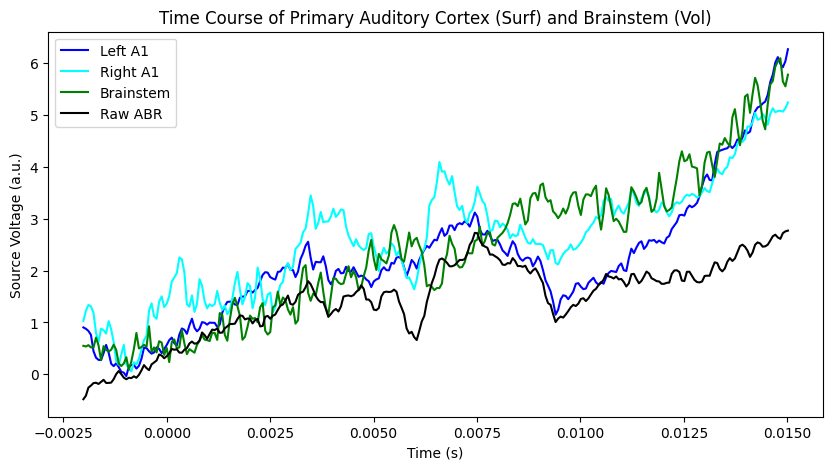

In [15]:
times = stc_surf.times
plt.figure(figsize=(10, 5))
plt.plot(times, auditory_tc[0].T, label="Left A1", color='blue')
plt.plot(times, auditory_tc[1].T, label="Right A1", color='cyan')
plt.plot(times, brainstem_tc, label="Brainstem", color='green')
plt.plot(times, y*2e7, label="Raw ABR", color='black')

plt.xlabel("Time (s)")
plt.ylabel("Source Voltage (a.u.)")
plt.title("Time Course of Primary Auditory Cortex (Surf) and Brainstem (Vol)")
plt.legend()
plt.show()

In [8]:
x = epochs.get_data()
x = x.transpose((1, 0, 2))
goods = [28, 3, 30, 26, 4, 25, 7, 31, 22, 9, 8, 21, 11, 12, 18]
y = (x[goods, :, :].mean(axis=0))
y=y.mean(axis=0)

Using data from preloaded Raw for 20288 events and 280 original time points ...
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6']
    Rejecting  epoch based on EEG : ['FC6', 'F8'

In [ ]:
import scipy.signal as signal
plt.plot(times, y*1e6, label="Raw ABR", color='black')
pk,props=signal.find_peaks(y, width=5)
plt.plot(times[pk], y[np.array(pk)]*1e6,"x")
pk[5]
plt.xlabel("Time (s)")
plt.ylabel("Source Voltage (a.u.)")


In [ ]:
def min_max_normalize(data):
    return (data - data.mean()) / data.std()

dt=evoked.data
norm_dt = min_max_normalize(dt)
evoked.data = norm_dt

In [ ]:
vlim = (-4.5, 4.5)
fig = evoked.plot_topomap(times[pk[2:6]],size=2)

In [ ]:
print(stc)